In [4]:
from tensorflow.keras.layers import Dense, Flatten,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

import tensorflow as tf

In [5]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\aaaya\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [17]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D( pool_size = (2,2) ))



model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))



model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=4, activation='sigmoid'))



model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])





train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/aaaya/Desktop/Workspace/KJSCE/MiniProject/dataset/train',target_size = (128, 128),batch_size = 32, class_mode = 'categorical')
valid_set = test_datagen.flow_from_directory('C:/Users/aaaya/Desktop/Workspace/KJSCE/MiniProject/dataset/val', target_size = (128, 128), batch_size = 16, class_mode = 'categorical')

labels = (training_set.class_indices)
print(labels)


hist = model.fit(training_set, steps_per_epoch = 30, epochs = 40, validation_data=valid_set)

Found 4081 images belonging to 4 classes.
Found 94 images belonging to 4 classes.
{'Maize - Blight': 0, 'Maize - Common_Rust': 1, 'Maize - Gray_Leaf_Spot': 2, 'Maize - Healthy': 3}
Epoch 1/40
30/30 [==============================] - 18s 580ms/step - loss: 1.2068 - accuracy: 0.5375 - val_loss: 1.9699 - val_accuracy: 0.3936
Epoch 2/40
30/30 [==============================] - 14s 478ms/step - loss: 0.5880 - accuracy: 0.7672 - val_loss: 1.2938 - val_accuracy: 0.4255
Epoch 3/40
30/30 [==============================] - 15s 509ms/step - loss: 0.5088 - accuracy: 0.7708 - val_loss: 1.2775 - val_accuracy: 0.4362
Epoch 4/40
30/30 [==============================] - 15s 493ms/step - loss: 0.5002 - accuracy: 0.7854 - val_loss: 1.9373 - val_accuracy: 0.4255
Epoch 5/40
30/30 [==============================] - 15s 496ms/step - loss: 0.4768 - accuracy: 0.7865 - val_loss: 1.4604 - val_accuracy: 0.4574
Epoch 6/40
30/30 [==============================] - 15s 510ms/step - loss: 0.4481 - accuracy: 0.8094 - v

In [21]:
img = "C:/Users/aaaya/Desktop/Workspace/KJSCE/MiniProject/dataset/test/Corn_Gray_Spot (35).jpg"

test_img = load_img(img, target_size=(128,128))




from PIL import Image 

im = Image.open(img)
im.show()



test_img = img_to_array(test_img)/255
test_img = np.expand_dims(test_img, axis = 0)


result = model.predict(test_img)

pred = np.argmax(result, axis=1)
print(pred)

1/1 [==============================] - 0s 27ms/step
[0]


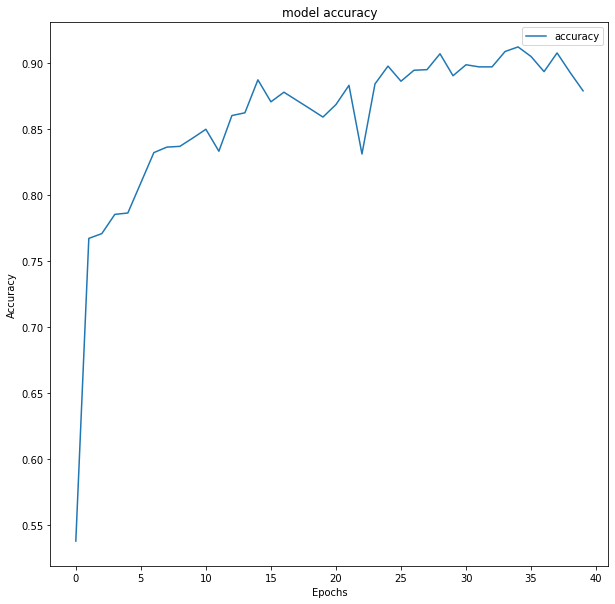

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy"])
plt.show()

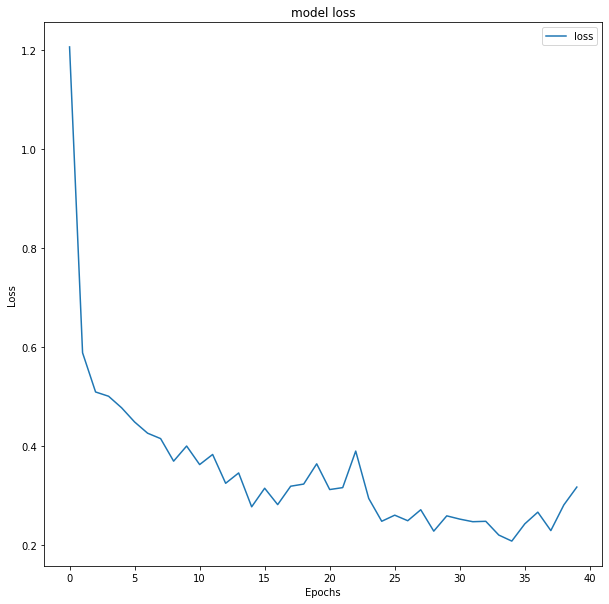

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss","Validation Loss"])
plt.show()

In [24]:
hist.history

{'loss': [1.2068315744400024,
  0.5880213379859924,
  0.5088121891021729,
  0.5001575350761414,
  0.47684139013290405,
  0.44811397790908813,
  0.42541322112083435,
  0.4144684374332428,
  0.3688625693321228,
  0.39944422245025635,
  0.3619357645511627,
  0.38239070773124695,
  0.32409077882766724,
  0.34501275420188904,
  0.2764842212200165,
  0.3140675127506256,
  0.280953586101532,
  0.3181678056716919,
  0.322508841753006,
  0.36347705125808716,
  0.3114115297794342,
  0.31534236669540405,
  0.38921698927879333,
  0.2934633791446686,
  0.24726158380508423,
  0.25959786772727966,
  0.248361274600029,
  0.2705629765987396,
  0.22729140520095825,
  0.2582116425037384,
  0.2516324818134308,
  0.24636906385421753,
  0.24718685448169708,
  0.21937374770641327,
  0.20716264843940735,
  0.24204117059707642,
  0.265691339969635,
  0.22837616503238678,
  0.2802796959877014,
  0.3164423406124115],
 'accuracy': [0.5375000238418579,
  0.7671957612037659,
  0.7708333134651184,
  0.78541666269302

'''Saving Model'''

In [11]:
model.save('C:/Users/aaaya/Desktop/Workspace/KJSCE/MiniProject/assets/backend_model.h5')

In [12]:
path="C:/Users/aaaya/Desktop/Workspace/KJSCE/MiniProject/assets/backend_model.h5"
model1 = tf.keras.models.load_model(path)

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [25]:
classifier_json=model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    model.save_weights("my_model_weights.h5")
    model.save("model.h5")
    print("Saved model to disk")

Saved model to disk
